In [1]:
from __future__ import division             
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import colors
import numpy as np
import colorsys
import math

In [2]:
def hsv2rgb(h, s, v):
    if s == 0.0: 
        return (v, v, v)

    H_i = int(h / 60)
    f = (h / 60) - H_i
    p = v * (1 - s) 
    q = v * (1 - s * f)
    t = v * (1 - s * (1 - f))
    
    if H_i == 0: return (v, t, p)
    if H_i == 1: return (q, v, p)
    if H_i == 2: return (p, v, t)
    if H_i == 3: return (p, q, v)
    if H_i == 4: return (t, p, v)
    if H_i == 5: return (v, p, q)

def gradient_hsv_rgb(h, s = 1, v = 0.95):
    return hsv2rgb(120 - h * 120, s, v) 

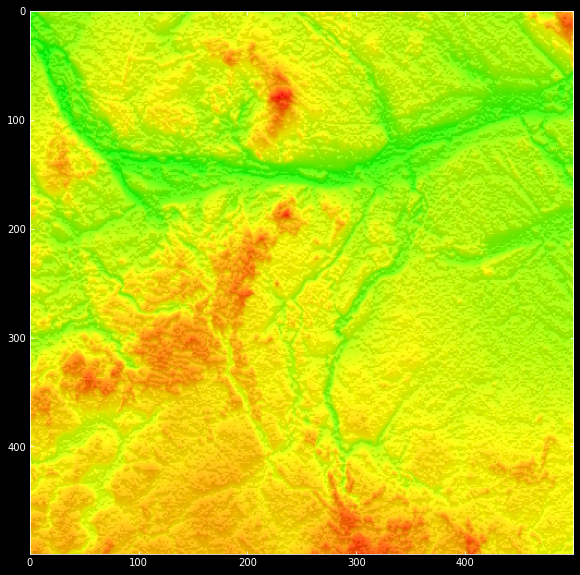

In [7]:
[w, h, d] = np.loadtxt('big.dem', max_rows=1).astype(int)
data = np.loadtxt('big.dem', skiprows=1)

plt.figure(figsize = (10, 10))

plt.xlim(left = 0, right = 499)
plt.ylim(bottom = 499, top = 0)
plt.tick_params(direction='in', top=True, right=True)

my_map = np.zeros((500, 500, 3))

max_value = 0
min_value = 100

for i in data:
    if max(i) > max_value:
        max_value = max(i)
    if min(i) < min_value:
        min_value = min(i)
        
# normalizacja
for i in range(w):
    for j in range(h):
        data[i, j] = (data[i, j] - min_value)/(max_value - min_value)

# metoda prosta
for i in range(w):
    for j in range(h):   
        
        if(i == 0):
            my_map[i, j] = gradient_hsv_rgb(data[i, j], s = 1)
        else:
            if(data[i, j] < data[i - 1, j]):
                my_map[i, j] = gradient_hsv_rgb(data[i, j], s = 1, v = 0.9)
            elif(data[i, j] > data[i - 1, j]):
                my_map[i, j] = gradient_hsv_rgb(data[i, j], s = 0.9, v = 1)
            else:
                my_map[i, j] = gradient_hsv_rgb(data[i, j], s = 1)
                          
        
        
fig.savefig('my-map.pdf')
plt.style.use(['dark_background'])
plt.imshow(my_map)

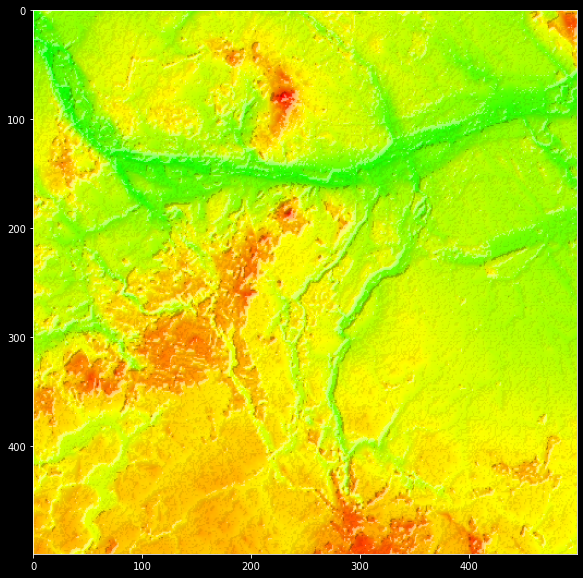

In [10]:
[w, h, d] = np.loadtxt('big.dem', max_rows=1).astype(int)
data = np.loadtxt('big.dem', skiprows=1)


plt.figure(figsize = (10, 10))
plt.xlim(left = 0, right = 499)
plt.ylim(bottom = 499, top = 0)

my_map = np.zeros((500, 500, 3))
angles = np.zeros((500, 500))
cos_table = np.zeros((500, 500))
sun = [500, 500, 500]

for i in range(w):
    for j in range(h):        
        [x, y, z] = [d/100, d/100, data[i, j] - data[i, j - 1] + data[i, j] - data[i - 1, j]]
#             [x, y] = [data[i, j] - data[i, j - 1] + data[i, j] - data[i - 1, j], -d/100]
    
        cos = (x * sun[0] + y * sun[1] + z * sun[2])/(np.sqrt(x**2 + y**2 + z**2) * np.sqrt(sun[0]**2 + sun[1]**2 + sun[2]**2))
        alfa = math.acos(cos)
        angles[i, j] = alfa
        cos_table[i, j] = cos
            
max_alfa, min_alfa = 0, 1
max_value, min_value = 0, 100

for i in range(h):
    if max(angles[i]) > max_alfa:
        max_alfa = max(angles[i])
    if min(angles[i]) < min_alfa:
        min_alfa = min(angles[i])    
        
    if max(data[i]) > max_value:
        max_value = max(data[i])
    if min(data[i]) < min_value:
        min_value = min(data[i])
        
for i in range(w):
    for j in range(h):     
        angles[i, j] = (angles[i, j] - min_alfa)/(max_alfa - min_alfa)
        data[i, j] = (data[i, j] - min_value)/(max_value - min_value)      
        
for i in range(w):
    for j in range(h):
        hue = data[i, j]
        sat = 1
        val = 1

        if (cos_table[i, j] > 0.85):
            sat = 1
            val = cos_table[i, j]/1.2
        elif cos_table[i, j] > 0.82:
            sat = 1
            val = cos_table[i, j] + 0.1
        elif cos_table[i, j] > 0.8:
            sat = 1
            val = 1
        elif cos_table[i, j] > 0.7:
            sat = cos_table[i, j] - 0.2
            val = 1
        else:
            sat = 0
            val = 1          
                
        my_map[i, j] = gradient_hsv_rgb(hue, sat, val)

        
        
fig.savefig('my-map-2.pdf')
plt.style.use(['dark_background'])
plt.imshow(my_map)
    